In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

plt.style.use('ggplot')

In [3]:
df = pd.read_csv('ElectricCarData.csv')

In [4]:
df.head(10)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8,250,610,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6,150,190,168,220,Yes,FWD,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1,150,275,164,420,Yes,FWD,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,650,Yes,RWD,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3,180,400,193,540,Yes,AWD,Type 2 CCS,SUV,D,5,55000


In [5]:
df.shape

(103, 14)

In [6]:
# Get column names using .columns
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [8]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


In [9]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [10]:
df[['Brand', #'Model', 
    'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', #'Segment', 
    'Seats', 'PriceEuro']]

,Brand,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro
0,Tesla,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,5,55480
1,Volkswagen,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,5,30000
2,Polestar,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,5,56440
3,BMW,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,5,68040
4,Honda,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,5,45000
99,Audi,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,5,96050
100,Nissan,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,5,50000
101,Nissan,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,5,65000


In [11]:
df.loc[df.duplicated(subset=['AccelSec'])]

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
12,Hyundai,Kona Electric 64 kWh,7.9,167,400,160,380,Yes,FWD,Type 2 CCS,SUV,B,5,40795
15,Volkswagen,ID.3 Pro S,7.9,160,440,175,590,Yes,RWD,Type 2 CCS,Hatchback,C,4,40936
16,Porsche,Taycan Turbo S,2.8,260,375,223,780,Yes,AWD,Type 2 CCS,Sedan,F,4,180781
20,Opel,Corsa-e,8.1,150,275,164,420,Yes,FWD,Type 2 CCS,Hatchback,B,5,29146
21,Tesla,Model Y Long Range Dual Motor,5.1,217,425,171,930,Yes,AWD,Type 2 CCS,SUV,D,7,58620
22,Skoda,Enyaq iV 50,10.0,160,290,179,230,Yes,RWD,Type 2 CCS,SUV,C,5,35000
28,BMW,i3 120 Ah,7.3,150,235,161,270,Yes,RWD,Type 2 CCS,Hatchback,B,4,38017
30,Audi,e-tron 50 quattro,6.8,190,280,231,450,Yes,AWD,Type 2 CCS,SUV,E,5,67358
34,Mazda,MX-30,9.0,150,180,178,240,Yes,FWD,Type 2 CCS,SUV,C,5,32646
35,Nissan,Leaf e+,7.3,157,325,172,390,Yes,FWD,Type 2 CHAdeMO,Hatchback,C,5,37237


In [12]:
df.query('Brand == "Tesla"')

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro


In [13]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


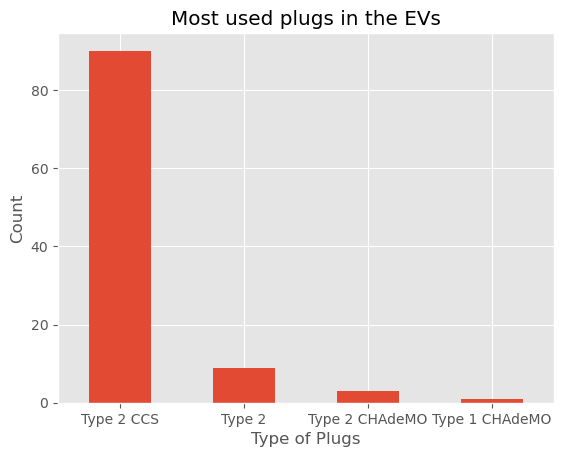

In [14]:
ax = df['PlugType'].value_counts().plot(kind='bar', title='Most used plugs in the EVs')
ax.set_xlabel('Type of Plugs')
ax.set_ylabel('Count')
plt.xticks(rotation=360)
plt.show()

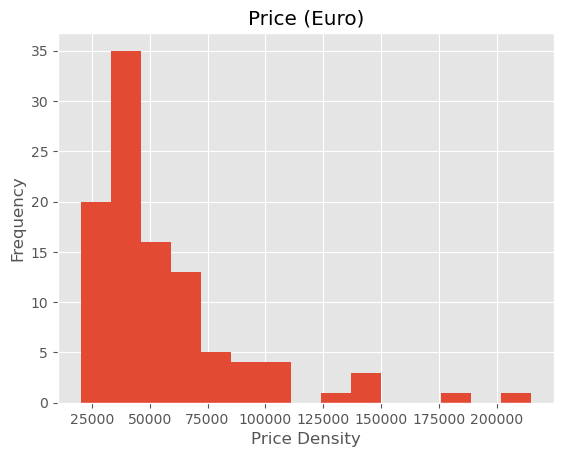

In [15]:
ax = df['PriceEuro'].plot(kind='hist', bins=15, title='Price (Euro)')
ax.set_xlabel('Price Density')
plt.show()

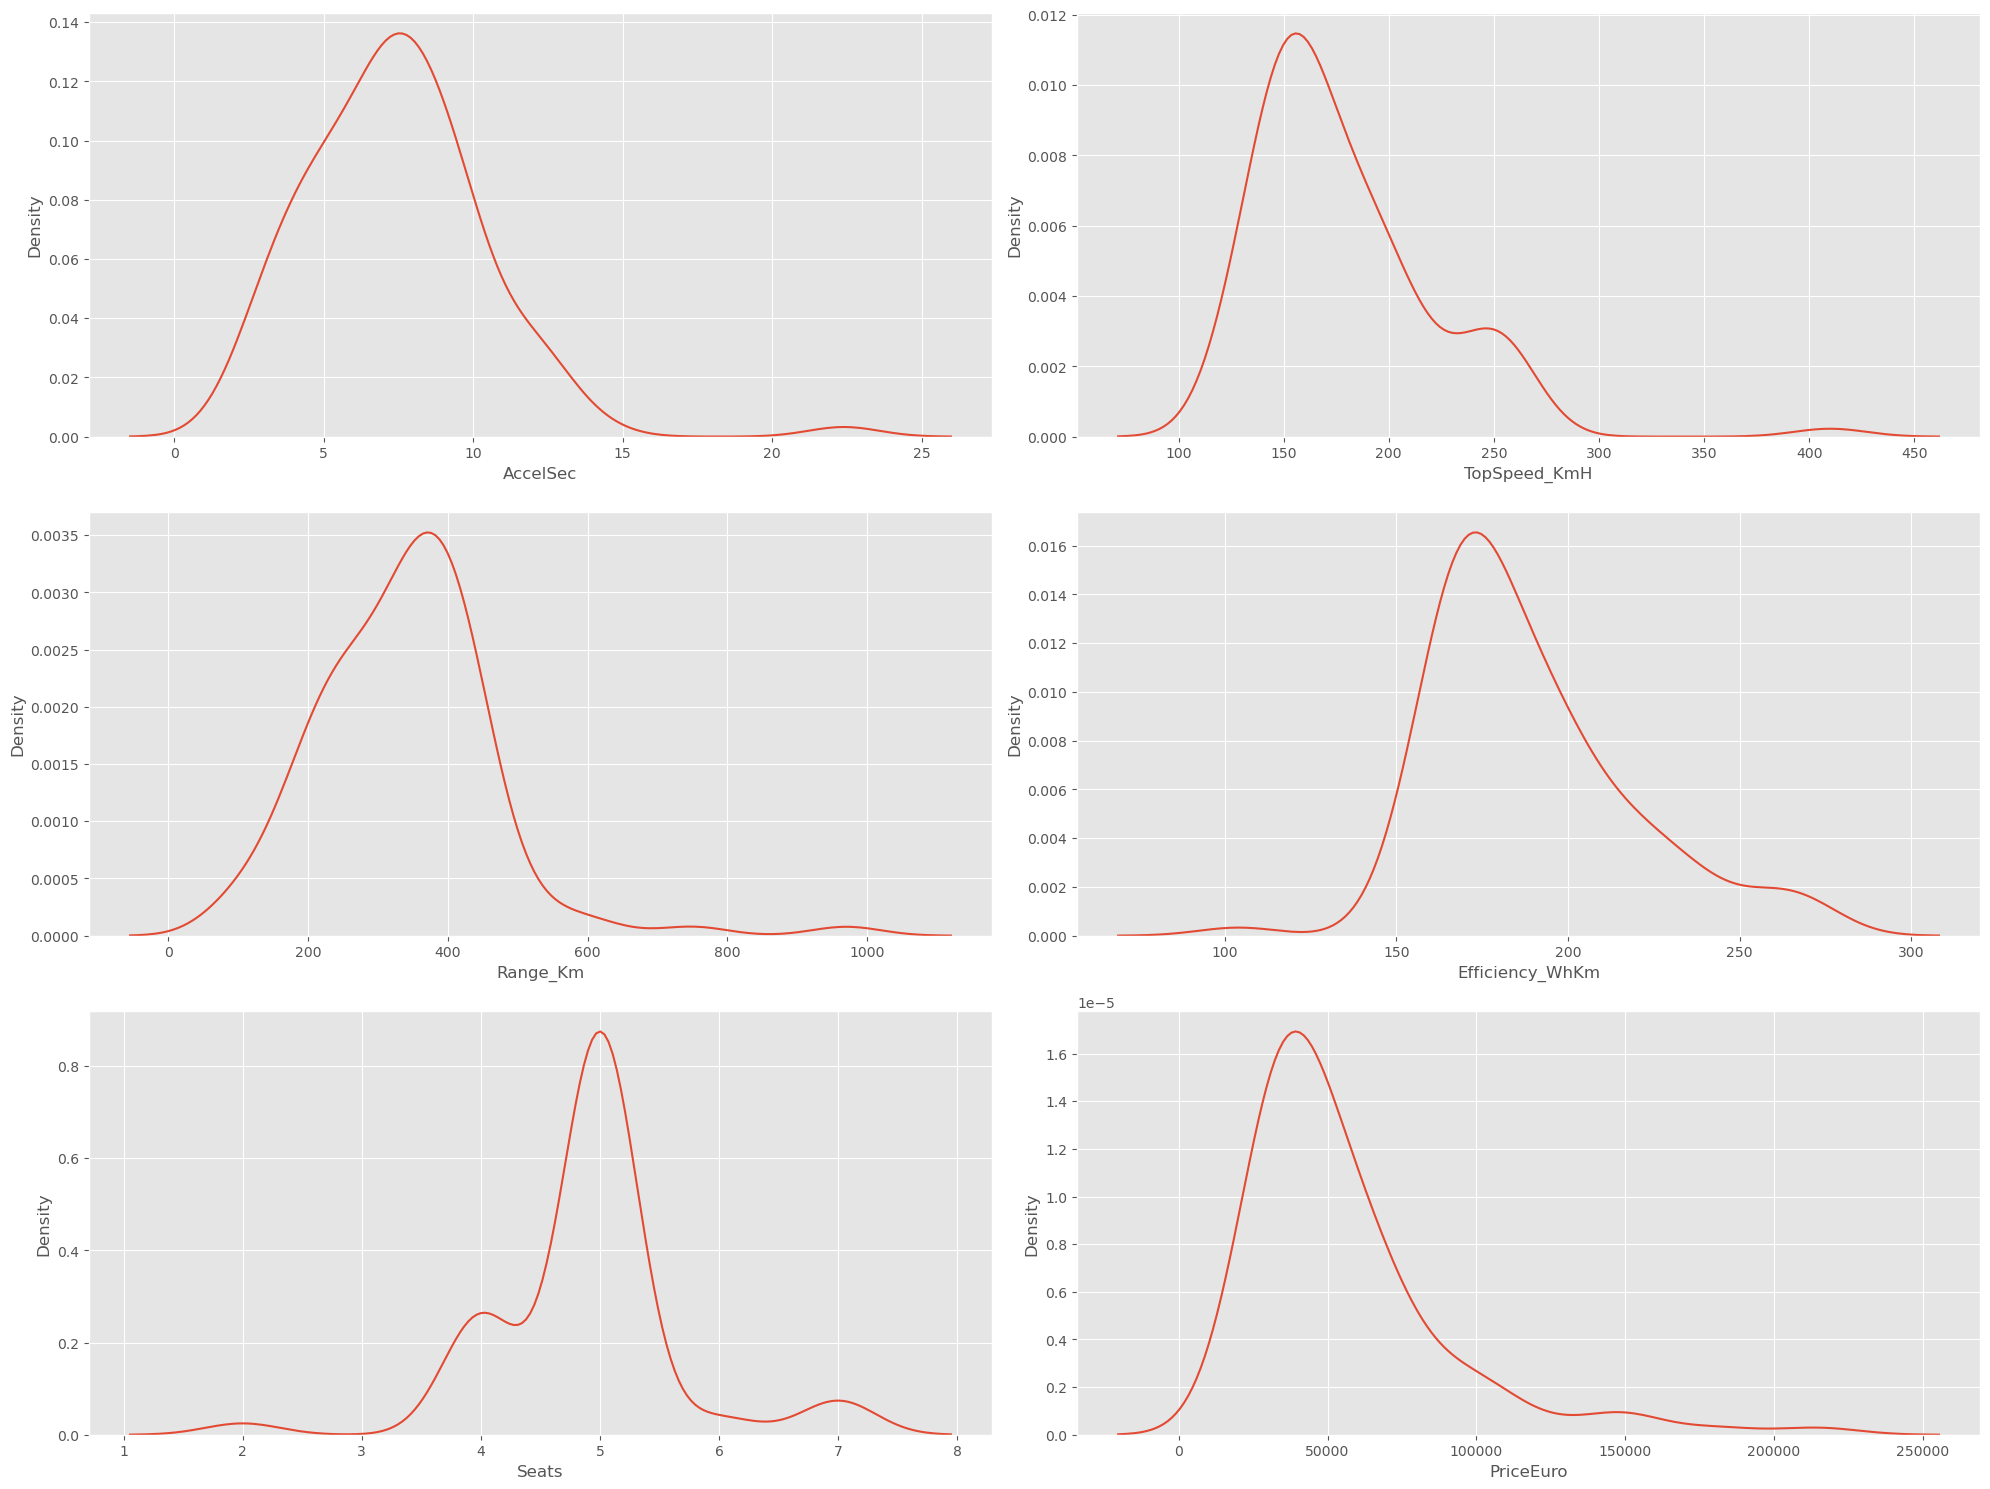

In [16]:
# It tells you where is the density of the attributes in the dataset
num_numeric_columns = df.select_dtypes(include=['number']).shape[1]
num_rows = (num_numeric_columns + 1) // 2  # Calculate the number of rows needed

plt.figure(figsize=(20, 5 * num_rows))  # Adjust the figure size based on the number of rows

for i, col in enumerate(df.select_dtypes(include=['number']), 1):
    plt.subplot(num_rows, 2, i)
    sns.kdeplot(df[col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

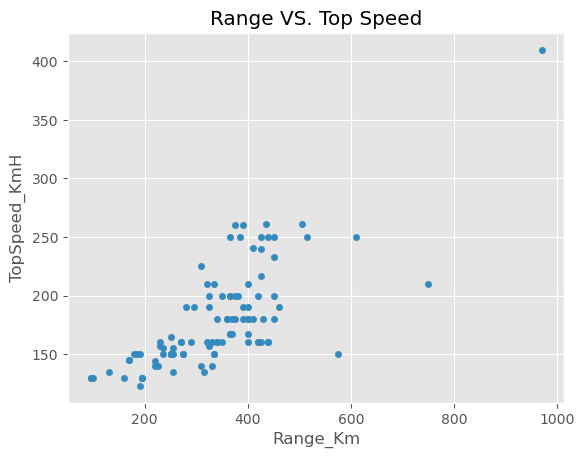

In [17]:
df.plot(kind='scatter',
       x='Range_Km',
       y='TopSpeed_KmH',
       title='Range VS. Top Speed')
plt.show()

<AxesSubplot:xlabel='Range_Km', ylabel='TopSpeed_KmH'>

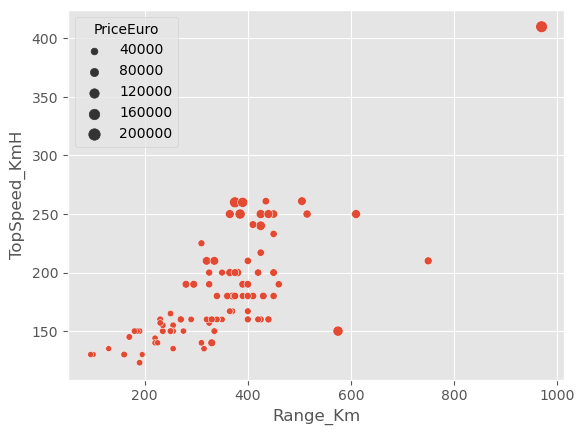

In [18]:
sns.scatterplot(x='Range_Km',
               y='TopSpeed_KmH',
               size='PriceEuro',
               data=df)

In [19]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


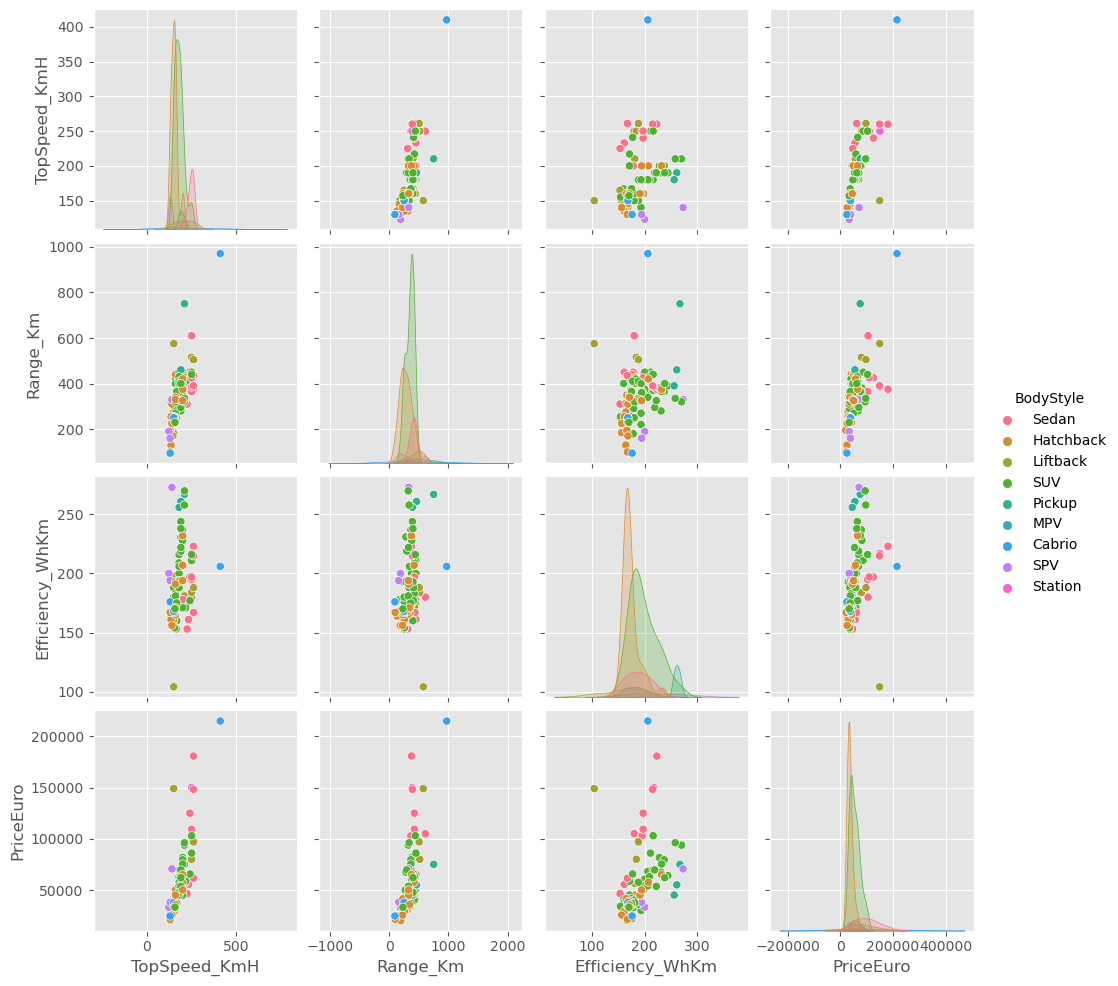

In [20]:
sns.pairplot(df,
            vars=['TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'PriceEuro'],
            hue='BodyStyle')

In [21]:
a = df['Brand'].value_counts()

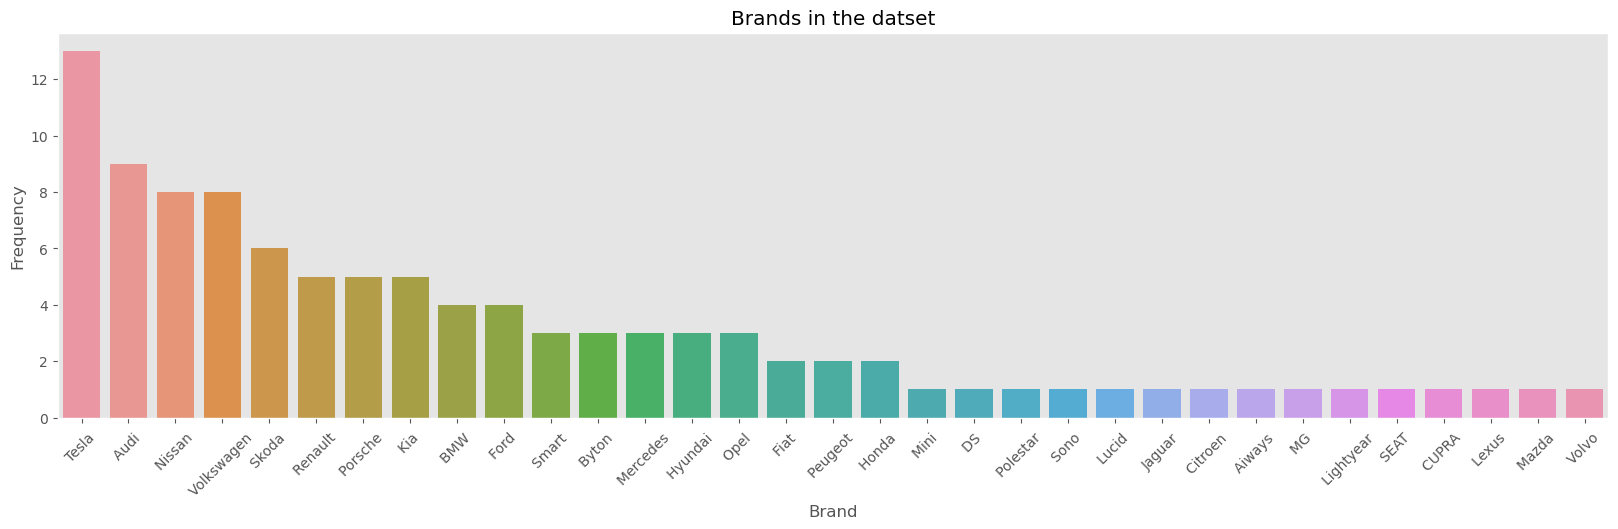

In [22]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x=a.index,y=a.values)
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Sort the DataFrame by 'Range_Km' column in descending order
df_sorted = df.sort_values(by='Range_Km', ascending=False)

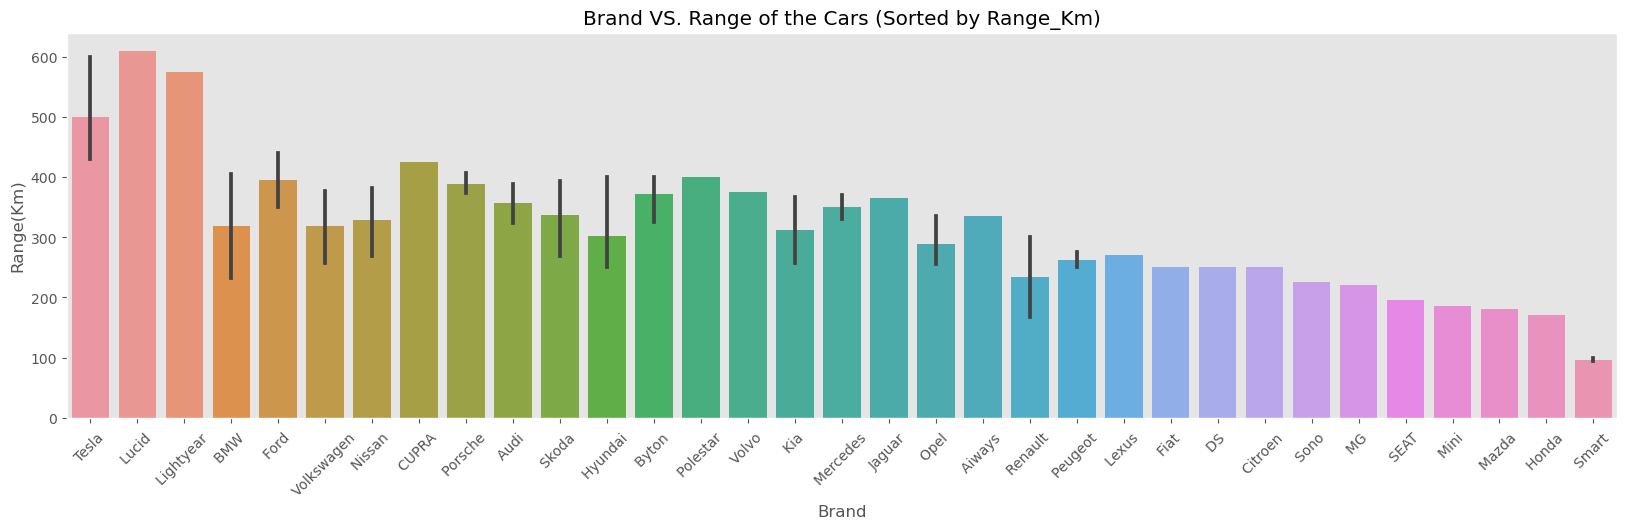

In [24]:
# Create the barplot using the sorted DataFrame
plt.figure(figsize=(20, 5))
sns.barplot(x='Brand', y='Range_Km', data=df_sorted)
plt.grid(axis='y')
plt.title('Brand VS. Range of the Cars (Sorted by Range_Km)')
plt.xlabel('Brand')
plt.ylabel('Range(Km)')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Sort the DataFrame by 'TopSpeed_KmH' column in descending order
df_sorted = df.sort_values(by='TopSpeed_KmH', ascending=False)

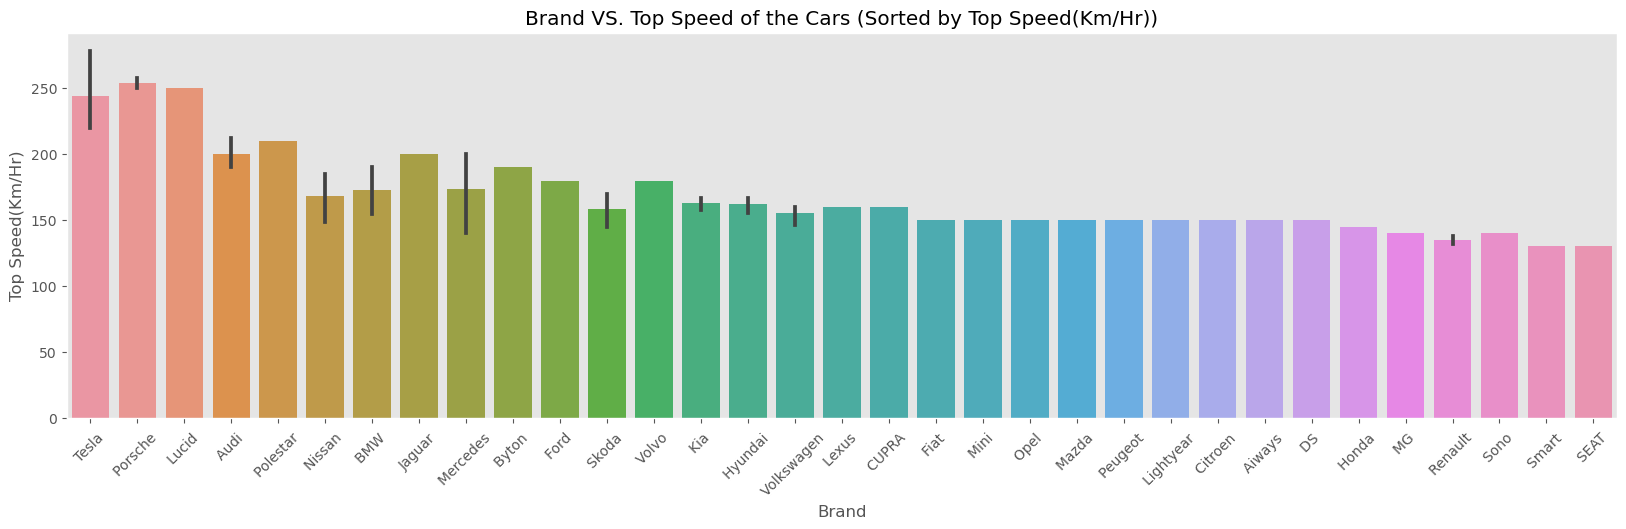

In [26]:
# Create the barplot using the sorted DataFrame
plt.figure(figsize=(20, 5))
sns.barplot(x='Brand', y='TopSpeed_KmH', data=df_sorted)
plt.grid(axis='y')
plt.title('Brand VS. Top Speed of the Cars (Sorted by Top Speed(Km/Hr))')
plt.xlabel('Brand')
plt.ylabel('Top Speed(Km/Hr)')
plt.xticks(rotation=45)
plt.show()

In [27]:
df_corr = df[['AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'Seats', 'PriceEuro']].corr()

<AxesSubplot:>

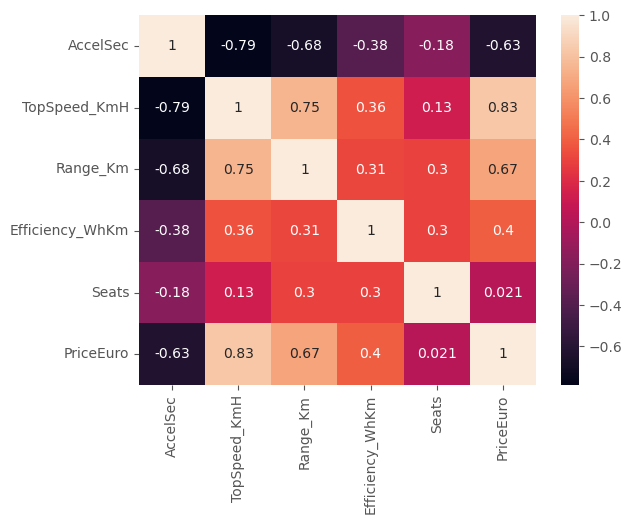

In [130]:
sns.heatmap(df_corr, annot=True)

In [30]:
df['Brand'] = df['Brand'].astype('category')
df['Model'] = df['Model'].astype('category')
df['AccelSec'] = df['AccelSec'].astype('category')
df['TopSpeed_KmH'] = df['TopSpeed_KmH'].astype('category')
df['Range_Km'] = df['Range_Km'].astype('category')
df['Efficiency_WhKm'] = df['Efficiency_WhKm'].astype('category')
df['FastCharge_KmH'] = df['FastCharge_KmH'].astype('category')
df['RapidCharge'] = df['RapidCharge'].astype('category')
df['PowerTrain'] = df['PowerTrain'].astype('category')
df['PlugType'] = df['PlugType'].astype('category')
df['BodyStyle'] = df['BodyStyle'].astype('category')
df['Segment'] = df['Segment'].astype('category')
df['Seats'] = df['Seats'].astype('category')
df['PriceEuro'] = df['PriceEuro'].astype('category')

In [31]:
df.dtypes

Brand              category
Model              category
AccelSec           category
TopSpeed_KmH       category
Range_Km           category
Efficiency_WhKm    category
FastCharge_KmH     category
RapidCharge        category
PowerTrain         category
PlugType           category
BodyStyle          category
Segment            category
Seats              category
PriceEuro          category
dtype: object

In [32]:
df['Brand'] = df['Brand'].cat.codes
df['Model'] = df['Model'].cat.codes
df['AccelSec'] = df['AccelSec'].cat.codes
df['TopSpeed_KmH'] = df['TopSpeed_KmH'].cat.codes
df['Range_Km'] = df['Range_Km'].cat.codes
df['Efficiency_WhKm'] = df['Efficiency_WhKm'].cat.codes
df['FastCharge_KmH'] = df['FastCharge_KmH'].cat.codes
df['RapidCharge'] = df['RapidCharge'].cat.codes
df['PowerTrain'] = df['PowerTrain'].cat.codes
df['PlugType'] = df['PlugType'].cat.codes
df['BodyStyle'] = df['BodyStyle'].cat.codes
df['Segment'] = df['Segment'].cat.codes
df['Seats'] = df['Seats'].cat.codes
df['PriceEuro'] = df['PriceEuro'].cat.codes

In [51]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,30,46,11,18,42,5,50,1,0,2,7,3,2,52
1,31,33,46,9,15,9,7,1,2,2,1,2,2,11
2,23,0,12,15,35,21,36,1,0,2,2,3,2,53
3,2,101,26,12,28,32,32,1,2,2,6,3,2,64
4,9,78,41,5,4,10,2,1,2,2,1,1,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,20,6,30,9,24,25,21,1,1,2,1,2,2,43
99,1,94,10,15,25,49,30,1,0,2,6,4,2,75
100,20,8,20,14,23,27,21,1,0,2,1,2,2,47
101,20,10,16,14,31,44,22,1,0,2,1,2,2,61


In [81]:
X = df.iloc[:, [13, 3]].values

In [82]:
wcss = []  # List to store the WCSS values for different k values

for k in range(1, 11):  # Try different values of k (1 to 10 in this example)
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)  # 'data' is preprocessed and scaled dataset
    wcss.append(kmeans.inertia_)

C:\Users\anike\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


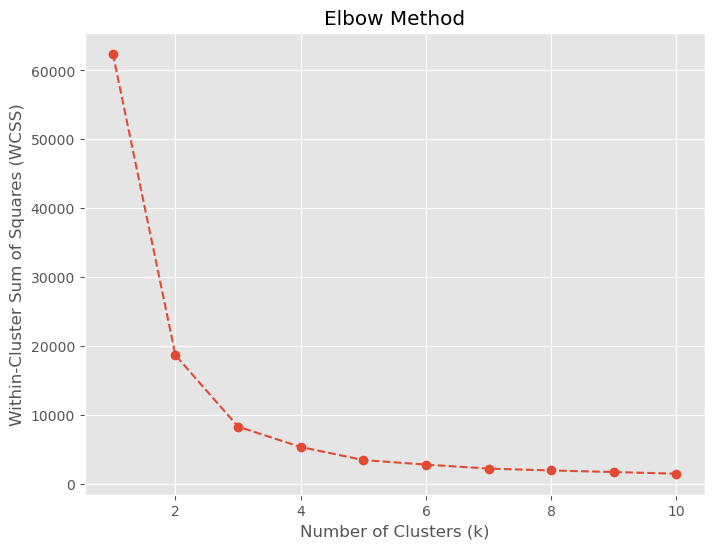

In [83]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [63]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

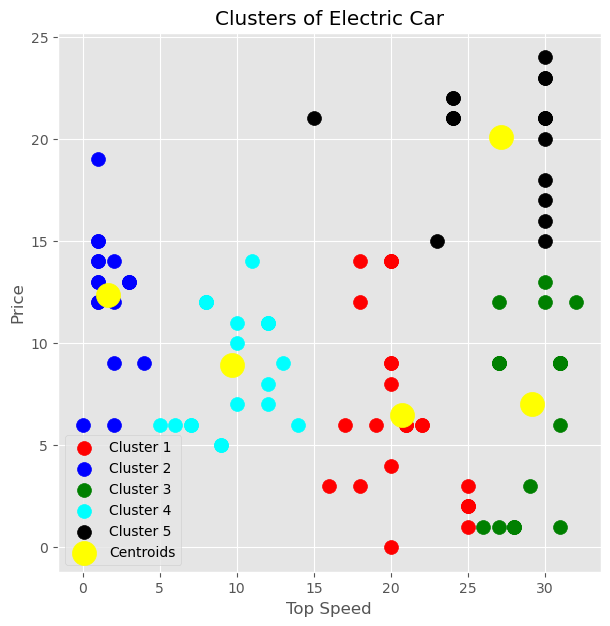

In [65]:
# Visualising the clusters
plt.figure(figsize=(7,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'black', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Electric Car')
plt.xlabel('Top Speed')
plt.ylabel('Price')
plt.legend()
plt.show()

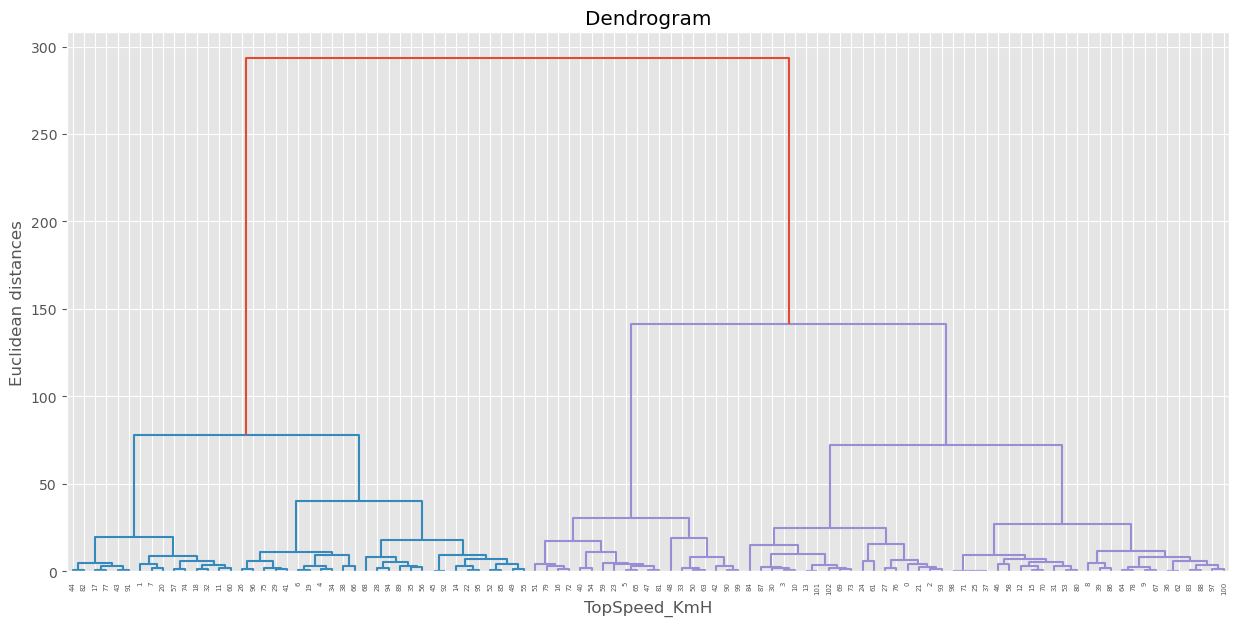

In [86]:
# Using the dendrogram to find the optimal number of clusters for TopSpeed of Electric Car
plt.figure(figsize=(15,7))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('TopSpeed_KmH')
plt.ylabel('Euclidean distances')
plt.show()

In [44]:
X = df.iloc[:, [0,4]].values

In [45]:
wcss = []  # List to store the WCSS values for different k values

for k in range(1, 11):  # Try different values of k (1 to 10 in this example)
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)  # 'data' is preprocessed and scaled dataset
    wcss.append(kmeans.inertia_)

C:\Users\anike\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


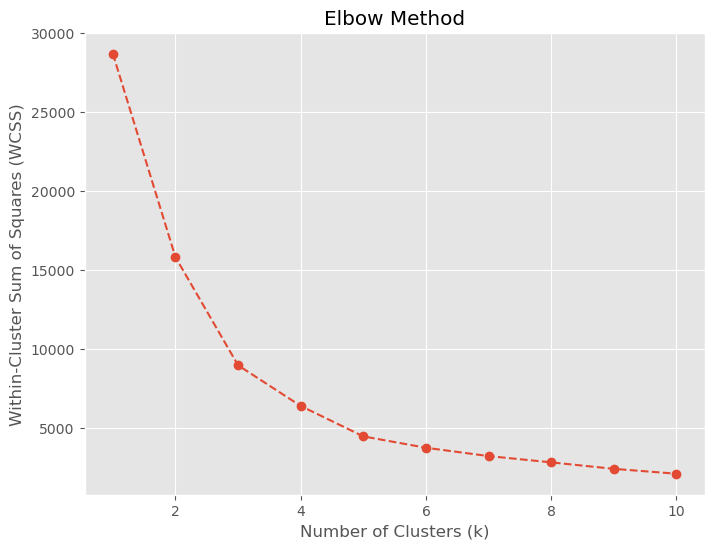

In [46]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [47]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

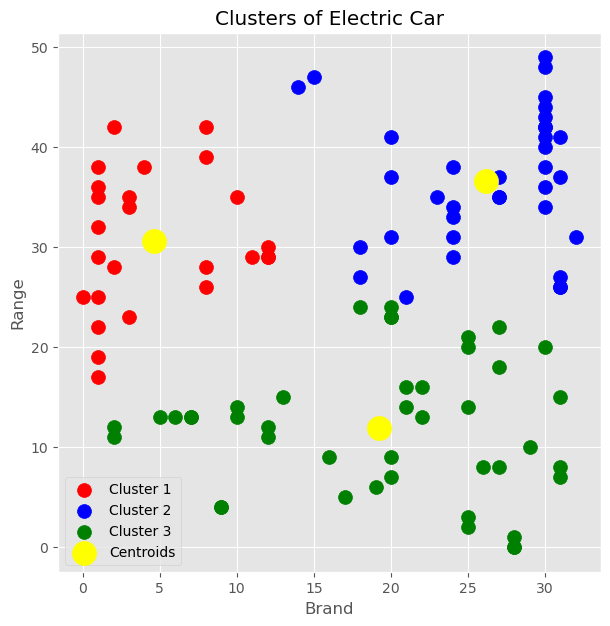

In [49]:
# Visualising the clusters
plt.figure(figsize=(7,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Electric Car')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.legend()
plt.show()

In [58]:
X = df.iloc[:, [0,3]].values

In [59]:
wcss = []  # List to store the WCSS values for different k values

for k in range(1, 11):  # Try different values of k (1 to 10 in this example)
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)  # 'data' is preprocessed and scaled dataset
    wcss.append(kmeans.inertia_)

C:\Users\anike\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


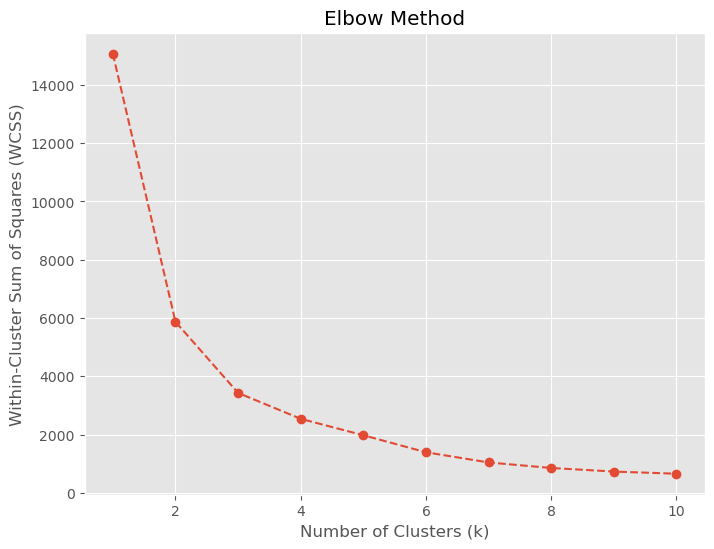

In [60]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [61]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

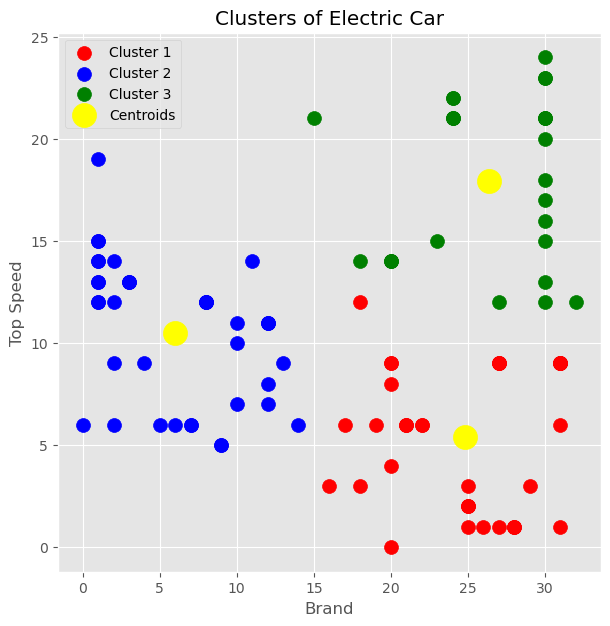

In [62]:
# Visualising the clusters
plt.figure(figsize=(7,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Electric Car')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.legend()
plt.show()